## 패키지

In [1]:
# 기본 패키지
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
# 모델 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# 모델 종류
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor


## 데이터

In [2]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
submission = pd.read_csv('../Data/sample_submission.csv')

In [3]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [4]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [5]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


## 데이터 오류 처리

#### 1.  전용면적별 세대수 합계와 총세대수가 일치하지 않는 경우  

error = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

train = train.query('단지코드 not in @error');train.index=range(0,2901);train.shape

#### 2.  동일한 단지에 단지코드가 2개로 부여된 경우 
- 제거
- 합

#### 제거

error = ['C2085','C1397','C2431','C1649','C1036']

train = train.query('단지코드 not in @error');train.index=range(0,2874);train.shape

#### 합

["C2085","C1397"] 의 총세대수 1339로 단지코드는 "C2085"로 통일

["C2431", "C1649"] 의 총세대수 1047, 등록차량대수 1214로 단지코드는 "C2431로"

["C1036"] 의 총세대수 1254 

temp = train.query('단지코드 in ["C2085","C1397"]');

temp.index

for idx in temp.index:
    train.iloc[idx,0]="C2085"
    train.iloc[idx,1]=1339

temp = train.query('단지코드 in ["C2431", "C1649"]');

for idx in temp.index:
    train.iloc[idx,0]="C2431"
    train.iloc[idx,1]=1047
    train.iloc[idx,-1]=1214

temp = train.query('단지코드 =="C1036"');

for idx in temp.index:
    train.iloc[idx,1]=1254

display(train.query('단지코드 in ["C2085","C1397"]').head(1),
        train.query('단지코드 in ["C2431", "C1649"]').head(1),
       train.query('단지코드 == "C1036"').head(1))

#### 3.  단지코드 등 기입 실수로 데이터 정제 과정에서 매칭 오류 발생  

error = ['C1095','C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

train = train.query('단지코드 not in @error');#train.index = range(0,2818);train.shape

## 결측치 확인

In [7]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [8]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

## 컬럼명 변경

지하쳘역 수와 버스 정류장 수의 컬럼명을 지하철, 버스로 변경하였습니다.

In [9]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [10]:
train.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수'
]

test.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수'
]

## 지하철 결측치
충남은 지하철 없는데 결측치로 되어있음

0으로 바꿀 필요가 있을까?

## 지역명 숫자로 매핑

In [11]:
local_map = {}
for i, loc in enumerate(train['지역'].unique()):
    local_map[loc] = i

In [12]:
train['지역'] = train['지역'].map(local_map)
test['지역'] = test['지역'].map(local_map)

## 전용면적-평수

In [13]:
train['전용면적'] = train['전용면적']//3.3

In [14]:
test['전용면적'] = test['전용면적']//3.3

## 임대료 구분

In [15]:
# 임대료 문자열 -> 숫자
train['임대료'] = train['임대료'].apply(lambda x : 0 if x == '-' else x).fillna(0).astype('int')
# 결측치나 '-'는 평균으로 채움 
train['임대료'] = train['임대료'].apply(lambda x : train['임대료'].mean() if x == 0 else x)
# 100000 단위로 쪼개서 개수를 셀 예정 
train['임대료'] = train['임대료'] // 100000

test['임대료'] = test['임대료'].apply(lambda x : 0 if x == '-' else x).fillna(0).astype('int')
test['임대료'] = test['임대료'].apply(lambda x : train['임대료'].mean() if x == 0 else x)
test['임대료'] = test['임대료'] // 100000

## 전용면적을 5의 배수로 변경

train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5

## 전용면적 상/하한 적용

상한100, 하한 15

idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<15].index
train.loc[idx, '전용면적'] = 15
idx = test[test['전용면적']<15].index
test.loc[idx, '전용면적'] = 15

test['전용면적'].unique()

## 단지별 데이터 1차원으로 취합

In [16]:
columns = ['단지코드', '총세대수','공가수', '지역', '단지내주차면수', '지하철', '버스']
target = '등록차량수'
area_columns = []
for area in train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [17]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [18]:
for i, code in tqdm(enumerate(train['단지코드'].unique())):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(test['단지코드'].unique())):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_test.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

423it [00:10, 41.93it/s]
150it [00:03, 42.11it/s]


In [19]:
# 새로 만든 임대료 열을 기존 new_train에 병합
rent = pd.pivot_table(train, index = '단지코드', columns = '임대료', aggfunc = 'count', values = '총세대수', fill_value = 0).reset_index()
new_train = pd.merge(new_train,rent,on=['단지코드'])
# test셋에서도 동일 적용
rent = pd.pivot_table(test, index = '단지코드', columns = '임대료', aggfunc = 'count', values = '총세대수', fill_value = 0).reset_index()
rent['6.0'] = 0
rent['9.0'] = 0
rent['10.0'] = 0
new_test = pd.merge(new_test, rent, on = ['단지코드'])

## 결측치 처리

In [20]:
new_train = new_train.fillna(-1)
new_test = new_test.fillna(-1)

## 스케일링

In [21]:
del new_train['단지코드']
del new_test['단지코드']

In [22]:
new_train

,총세대수,공가수,지역,단지내주차면수,지하철,버스,면적_12.0,면적_15.0,면적_18.0,면적_10.0,...,등록차량수,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,10.0
0,900.0,38.0,0.0,1425.0,0.0,3.0,149.0,665.0,86.0,0.0,...,1015.0,0,7,1,0,0,0,0,0,0
1,545.0,17.0,1.0,624.0,0.0,3.0,80.0,132.0,0.0,276.0,...,205.0,1,6,0,0,0,0,0,0,0
2,1216.0,13.0,2.0,1285.0,1.0,1.0,362.0,124.0,0.0,0.0,...,1064.0,0,9,2,0,0,0,0,0,0
3,755.0,6.0,3.0,734.0,1.0,3.0,240.0,303.0,212.0,0.0,...,730.0,0,4,2,0,0,0,0,0,0
4,696.0,14.0,4.0,645.0,0.0,2.0,0.0,246.0,0.0,0.0,...,553.0,0,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,90.0,7.0,9.0,66.0,0.0,3.0,0.0,0.0,0.0,0.0,...,57.0,1,4,0,0,0,0,0,0,0
419,492.0,24.0,5.0,521.0,0.0,1.0,0.0,0.0,0.0,0.0,...,246.0,0,4,1,0,0,0,0,0,0
420,40.0,7.0,8.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,...,19.0,1,2,0,0,0,0,0,0,0
421,90.0,12.0,11.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,...,16.0,0,1,0,0,0,0,0,0,0


In [23]:
new_test

,총세대수,공가수,지역,단지내주차면수,지하철,버스,면적_12.0,면적_15.0,면적_18.0,면적_10.0,...,면적_24.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,10.0
0,754.0,14.0,3.0,683.0,0.0,2.0,116.0,376.0,0.0,0.0,...,0.0,0,1,7,0,0,0,0,0,0
1,1354.0,9.0,3.0,1216.0,0.0,3.0,420.0,578.0,0.0,0.0,...,0.0,0,3,6,0,0,0,0,0,0
2,619.0,18.0,8.0,547.0,0.0,16.0,15.0,132.0,44.0,82.0,...,0.0,0,4,4,1,0,0,0,0,0
3,593.0,7.0,4.0,543.0,0.0,3.0,0.0,84.0,0.0,0.0,...,0.0,0,4,0,0,0,0,0,0,0
4,1297.0,11.0,3.0,1112.0,0.0,2.0,425.0,304.0,0.0,0.0,...,0.0,0,0,2,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,349.0,17.0,9.0,270.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0,3,1,0,0,0,0,0,0
146,596.0,35.0,11.0,593.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,2,3,0,0,0,0,0,0
147,120.0,9.0,5.0,40.0,0.0,1.0,0.0,0.0,0.0,54.0,...,0.0,2,0,0,0,0,0,0,0,0
148,675.0,38.0,1.0,467.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6,3,2,0,0,0,0,0,0


In [24]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

pd.set_option('max_columns', 20, 'max_rows', 20)
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

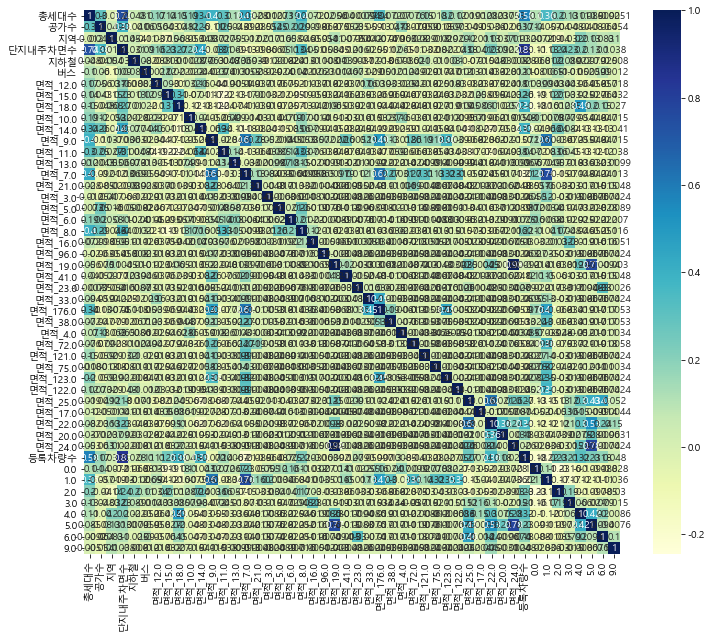

In [25]:
import warnings; warnings.filterwarnings("ignore")
# 상관계수(-1 ~ +1)를 통해 feature 간의 유사성을 파악 
plt.figure(figsize=(12,10))
sns.heatmap(new_train.iloc[:,0:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

### Select Features

## 데이터셋 분할

In [26]:
new_train

,총세대수,공가수,지역,단지내주차면수,지하철,버스,면적_12.0,면적_15.0,면적_18.0,면적_10.0,...,등록차량수,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,10.0
0,900.0,38.0,0.0,1425.0,0.0,3.0,149.0,665.0,86.0,0.0,...,1015.0,0,7,1,0,0,0,0,0,0
1,545.0,17.0,1.0,624.0,0.0,3.0,80.0,132.0,0.0,276.0,...,205.0,1,6,0,0,0,0,0,0,0
2,1216.0,13.0,2.0,1285.0,1.0,1.0,362.0,124.0,0.0,0.0,...,1064.0,0,9,2,0,0,0,0,0,0
3,755.0,6.0,3.0,734.0,1.0,3.0,240.0,303.0,212.0,0.0,...,730.0,0,4,2,0,0,0,0,0,0
4,696.0,14.0,4.0,645.0,0.0,2.0,0.0,246.0,0.0,0.0,...,553.0,0,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,90.0,7.0,9.0,66.0,0.0,3.0,0.0,0.0,0.0,0.0,...,57.0,1,4,0,0,0,0,0,0,0
419,492.0,24.0,5.0,521.0,0.0,1.0,0.0,0.0,0.0,0.0,...,246.0,0,4,1,0,0,0,0,0,0
420,40.0,7.0,8.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,...,19.0,1,2,0,0,0,0,0,0,0
421,90.0,12.0,11.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,...,16.0,0,1,0,0,0,0,0,0,0


In [27]:
y_train = new_train['등록차량수']
x_train = new_train.drop('등록차량수',axis=1)
x_test = new_test.iloc[:,0:]

In [28]:
x_train.shape, x_test.shape

((423, 48), (150, 48))

In [29]:
from sklearn.preprocessing import PowerTransformer

# 스케일링 - 정규분포에 가깝게 만들기
power = PowerTransformer(standardize = True)
x_train = power.fit_transform(x_train)
x_test = power.transform(x_test)

## 검증

In [30]:
models = [RandomForestRegressor(n_jobs=-1, random_state=42), 
          Ridge(random_state=42), Lasso(random_state=42),ElasticNet(random_state=42),
          BayesianRidge(),XGBRegressor(random_state=42),LGBMRegressor(random_state=42),
          GradientBoostingRegressor(random_state=42),
          CatBoostRegressor(random_state=42)
         ]
score = []
std = []
for model in models:
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model,
                         x_train,
                         y_train,
                         scoring='neg_mean_squared_error',
                         cv = kfold,
                         n_jobs = -1)
    scores *= -1
    score.append(scores.mean())
    std.append(scores.std())
    print("{}\n[Mean]: {:.3f} [Std]: {:.3f}\n".format(
        '<' + str(model).split('(')[0] + '>', scores.mean(), scores.std(), scores.min(), scores.max()))

<RandomForestRegressor>
[Mean]: 39265.651 [Std]: 3883.108

<Ridge>
[Mean]: 43748.239 [Std]: 8888.956

<Lasso>
[Mean]: 42230.683 [Std]: 8838.642

<ElasticNet>
[Mean]: 47770.003 [Std]: 10787.835

<BayesianRidge>
[Mean]: 43033.101 [Std]: 9083.226

<XGBRegressor>
[Mean]: 43214.509 [Std]: 4904.218

<LGBMRegressor>
[Mean]: 40934.599 [Std]: 5849.039

<GradientBoostingRegressor>
[Mean]: 36080.691 [Std]: 4714.189

<<catboost.core.CatBoostRegressor object at 0x000002945D5BC400>>
[Mean]: 36675.724 [Std]: 4434.898



In [31]:
# 평균과 표준편차 모두 낮아야 일반화됨
def mean_std_plot(co1, co2, data):    
    plt.figure(figsize = (20,10))
    g = sns.scatterplot(x = 'score', y = 'std', data = df, s = 80, color = 'red', )
    for line in range(df.shape[0]):
        g.text(x = df.score[line]-300, y = df['std'][line]+100, s = df.model[line], fontsize = 15)
    plt.grid()
    plt.ylabel('Std')
    plt.xlabel('Score')
    plt.show()

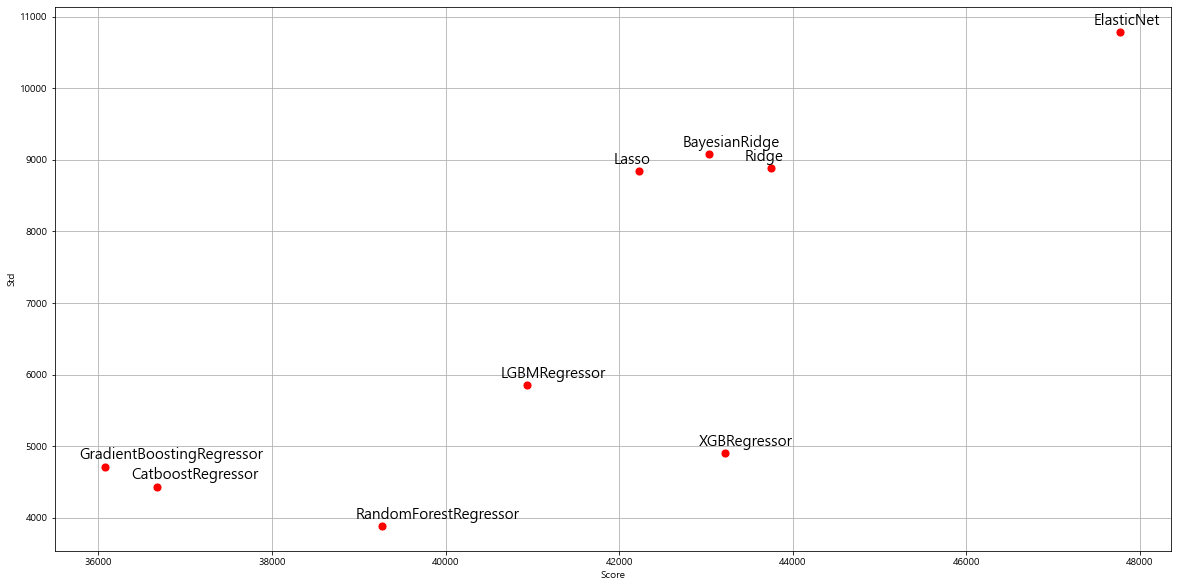

In [32]:
# 모델이름 정리
model_plot = models.copy()
for index,i in enumerate(model_plot):
    if str(i).startswith('<') :
        model_plot[index] = 'CatboostRegressor'
    else : model_plot[index] = str(i).split('(')[0]

# 데이터프레임으로 변환        
df = pd.DataFrame({'model' : model_plot, 'score' : score, 'std' : std})
# 평균과 표준편차 그래프 그리기 (좌하단일수록 좋음)
mean_std_plot('score','std', df)

## 학습

In [33]:
# 평균이 최소인 모델로 학습 (std도 고려할 필요가 있음)
#model = models[score.index(min(score))]
model = models[-1]
print(f'학습할 모델 : {model}')

try :
    model.fit(x_train, y_train, verbose = 0)
except :
    model.fit(x_train, y_train)

학습할 모델 : <catboost.core.CatBoostRegressor object at 0x000002945D5BC400>


## 추론 및 제출

In [34]:
pred = model.predict(x_test)

In [35]:
submission['num'] = pred

In [36]:
submission

,code,num
0,C1072,722.381682
1,C1128,1304.451337
2,C1456,539.996683
3,C1840,547.224015
4,C1332,1243.553545
...,...,...
145,C2456,235.726686
146,C1266,504.856290
147,C2152,46.020167
148,C1267,399.474012


### Make Submissions

In [37]:
t = pd.Timestamp.now()
fname = f'submissions_dacon.csv'
submission.to_csv(fname, index=False)
print("'{}' is ready to submit." .format(fname))

'submissions_dacon.csv' is ready to submit.


### END